# Education in Iraq - IHSES data

Latest update: September 2023, JW

Data available from: https://microdata.worldbank.org/index.php/catalog/2334

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [2]:
from pathlib import Path
Path.cwd()

WindowsPath('C:/Users/ba8ak9/Documents/Python Scripts')

## Dataframe: merge and overview

In [3]:
ihses_hh = pd.read_stata('data/2012ihses01_household_roster.dta')
ihses_edu = pd.read_stata('data/2012ihses05_education.dta')

In [4]:
ihses_hh.head()

,questid,stratum,weight,weight_s7_adult,weight_s21,weight_s24,governorate,qhada,cluster,hh,...,q0106,q0107,q0108,q0109,q0110,q0111,q0112,q0113,q0114,q0115
0,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,NaN,NaN,YES,NaN,YES,1.0,NaN,YES,2.0,NaN
1,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,MARRIED,1.0,YES,NaN,DIED,NaN,"NO CERTIFICATE, ILLITERATE",DIED,NaN,"NO CERTIFICATE, ILLITERATE"
2,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,NaN,NaN,YES,NaN,YES,1.0,NaN,YES,2.0,NaN
3,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,MARRIED,2.0,YES,NaN,NO,NaN,BACHELOR DEGREE,NO,NaN,"NO CERTIFICATE, ILLITERATE"
4,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,NaN,NaN,YES,NaN,YES,1.0,NaN,YES,2.0,NaN


In [5]:
ihses_edu.head()

,questid,stratum,weight,weight_s7_adult,weight_s21,weight_s24,governorate,qhada,cluster,hh,...,q0516_2,q0516_3,q0516_4,q0517_1,q0517_2,q0517_3,q0518_1,q0518_2,q0518_3,q0519
0,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,Chatting,NaN,NaN,Communicate with relatives and friends,NaN,NaN,4.0
4,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Merge dataframes

In [6]:
ihses = pd.merge(ihses_hh, ihses_edu, on=['questid', 'idcode'])

In [7]:
# keep individuals born between 1947 and 1986
ihses = ihses.loc[ihses['q0103y'].isin([*range(1947, 1987)]), ['weight_x', 'governorate_x', 'q0102', 'q0103y', 'q0104', 'q0502', 'q0503', 'q0505', 'q0506']].copy()

In [8]:
ihses.head()

,weight_x,governorate_x,q0102,q0103y,q0104,q0502,q0503,q0505,q0506
1,221.348129,DUHOK,FEMALE,1982.0,29.0,"Yes, in the past",Diploma from an institution,NaN,NaN
3,221.348129,DUHOK,MALE,1972.0,39.0,"Yes, in the past",Diploma from an institution,NaN,NaN
8,221.348129,DUHOK,MALE,1954.0,57.0,"Yes, in the past",Bachelor degree,NaN,NaN
9,221.348129,DUHOK,FEMALE,1985.0,27.0,"Yes, in the past",Bachelor degree,NaN,NaN
10,221.348129,DUHOK,FEMALE,1960.0,51.0,"No, i have never enrolled before",NaN,NaN,There is no easily accessible school in my nei...


In [9]:
ihses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58607 entries, 1 to 176040
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   weight_x       58607 non-null  float64 
 1   governorate_x  58607 non-null  category
 2   q0102          58607 non-null  category
 3   q0103y         58607 non-null  float64 
 4   q0104          58607 non-null  float64 
 5   q0502          58607 non-null  category
 6   q0503          44974 non-null  category
 7   q0505          38140 non-null  category
 8   q0506          13009 non-null  category
dtypes: category(6), float64(3)
memory usage: 2.1 MB


## Data preparation

### Sociodemographic information

In [10]:
# gender
ihses['gender'] = ihses['q0102'].str.lower()
ihses['gender'].value_counts()

gender
female    30676
male      27931
Name: count, dtype: int64

In [11]:
# age
ihses['age'] = ihses['q0104']
ihses['age'].describe()

count    58607.000000
mean        39.901240
std         10.622908
min         25.000000
25%         31.000000
50%         38.000000
75%         47.000000
max         65.000000
Name: age, dtype: float64

In [12]:
# age group

bins = [15, 25, 35, 45, 55, 65]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64']

ihses['age_group'] = pd.cut(ihses['age'], bins=bins, labels=labels)

ihses['age_group'].value_counts()

age_group
25-34    23387
35-44    17514
45-54     9490
55-64     7187
15-24     1029
Name: count, dtype: int64

In [13]:
# birth year
ihses['byear'] = ihses['q0103y'].astype(int)
ihses['byear'].value_counts()

byear
1985    2680
1986    2667
1983    2523
1982    2468
1984    2463
1980    2308
1979    2268
1981    2261
1978    2113
1972    1994
1976    1992
1975    1973
1977    1896
1974    1894
1970    1834
1973    1818
1971    1710
1969    1606
1968    1553
1967    1418
1966    1333
1965    1301
1964    1246
1962    1104
1963    1093
1955    1044
1954     984
1956     853
1957     846
1952     836
1960     831
1953     824
1950     780
1961     776
1951     730
1959     584
1947     580
1949     576
1958     480
1948     367
Name: count, dtype: int64

In [14]:
# region
ihses['region'] = ihses['governorate_x'].str.title()
ihses.loc[ihses['region']=='Thi-Qar', 'region'] = 'Thiqar'
ihses.loc[ihses['region']=='Salah Al-Deen', 'region'] = 'Salahaddin'
ihses.loc[ihses['region']=='Maysan', 'region'] = 'Misan'
ihses.loc[ihses['region']=='Diyala', 'region'] = 'Diala'
ihses.loc[ihses['region']=='Muthanna', 'region'] = 'Muthana'
ihses.loc[ihses['region']=='Babylon', 'region'] = 'Babil'
ihses.loc[ihses['region']=='Qadisiya', 'region'] = 'Qadisyah'
ihses.loc[ihses['region']=='Kerbela', 'region'] = 'Karbala'
ihses['region'].value_counts()

region
Sulaimaniya    6656
Baghdad        4955
Anbar          4381
Nainawa        4294
Salahaddin     4202
Erbil          3933
Basrah         3701
Wasit          3272
Duhok          3238
Misan          3210
Diala          2807
Thiqar         2507
Muthana        2305
Babil          2161
Qadisyah       2079
Kirkuk         1965
Najaf          1618
Karbala        1323
Name: count, dtype: int64

### Educational attainment

In [15]:
# ever attended school?
ihses['q0502'].value_counts()

q0502
Yes, in the past                    44974
No, i have never enrolled before    13009
Yes, currently attending              624
Name: count, dtype: int64

In [16]:
# highest educational level (individual)
ihses['q0503'].value_counts()

q0503
Elementary                     15730
No certificate                 15019
Intermediate (mid school)       4359
Diploma from an institution     3626
Bachelor degree                 2948
Preparatory                     2109
Vocational                       751
Basic                            173
Master degree                    105
Postgraduate diploma              58
Other                             50
Phd (doctorate)                   46
Name: count, dtype: int64

In [17]:
# join information from columns q0502 and q0503

ihses.loc[ihses['q0502']=='No, i have never enrolled before', 'edulevel'] = 0
#ihses.loc[ihses['q0502']=='Yes, currently attending', 'edulevel'] = 5

ihses.loc[ihses['q0503']=='No certificate', 'edulevel'] = 0
ihses.loc[ihses['q0503']=='Elementary', 'edulevel'] = 1
ihses.loc[ihses['q0503']=='Intermediate (mid school)', 'edulevel'] = 2
ihses.loc[ihses['q0503']=='Basic', 'edulevel'] = 2
ihses.loc[ihses['q0503']=='Preparatory', 'edulevel'] = 3
ihses.loc[ihses['q0503']=='Vocational', 'edulevel'] = 3
ihses.loc[ihses['q0503']=='Bachelor degree', 'edulevel'] = 4
ihses.loc[ihses['q0503']=='Diploma from an institution', 'edulevel'] = 4
ihses.loc[ihses['q0503']=='Master degree', 'edulevel'] = 4
ihses.loc[ihses['q0503']=='Postgraduate diploma', 'edulevel'] = 4
ihses.loc[ihses['q0503']=='Phd (doctorate)', 'edulevel'] = 4

# map values to educational variable
edumap = {0:'no education', 1:'primary education', 2:'lower secondary education', 
          3:'upper secondary education', 4:'higher education', 5:'currently attending'}
ihses['edulevel'] = ihses['edulevel'].map(edumap)

ihses['edulevel'].value_counts()

edulevel
no education                 28028
primary education            15730
higher education              6783
lower secondary education     4532
upper secondary education     2860
Name: count, dtype: int64

### Reasons for no/low education

In [18]:
# main reason for low education
ihses['q0505'].value_counts()

q0505
I have to work to support my family                                      10722
Social reasons                                                            8588
Doesn't want to                                                           6050
Hh could not afford schools expenses                                     2958
There is no easily accessible school in my neighbourhood                  2892
Household chores                                                          1744
Early marriage                                                            1596
Other (specify: ___________)                                              1158
Going to school is hazardous                                               811
School time is not flexible                                                469
My household thought that education is not useful to get a better job      418
Sickness or disability                                                     331
Teaching is not good and serious enough to enc

In [19]:
# main reason for no education
ihses['q0506'].value_counts()

q0506
There is no easily accessible school in my neighbourhood                 4484
Social reasons                                                           4317
I have to work to support my family                                       880
I am not interested to go to school                                       811
Hh could not afford schools expenses                                     627
I have to work in the household                                           568
Sickness or disability                                                    394
My household thought that education is not useful to get a better job     310
Early marriage                                                            184
Going to school is hazardous                                              153
School time is not flexible                                                92
Teaching is not serious enough to encourage enrollment                     80
Other (specify: ___________)                              

In [20]:
# join information from columns q0505 and q0506

ihses['reason'] = np.where(ihses['q0505'].isnull(), ihses['q0506'], ihses['q0505'])

# group categories with too few observations as 'other'
ihses.loc[ihses['reason']=='Still too young', 'reason'] = 'Other reasons'
ihses.loc[ihses['reason']=='Mistreatment of the teacher/ instructor/ professor', 'reason'] = 'Other reasons'
ihses.loc[ihses['reason']=='Teaching is not good and serious enough to encourage continuity', 'reason'] = 'Other reasons'
ihses.loc[ihses['reason']=='Teaching is not serious enough to encourage enrollment', 'reason'] = 'Other reasons'
ihses.loc[ihses['reason']=='School time is not flexible', 'reason'] = 'Other reasons'
ihses.loc[ihses['reason']=='Sickness or disability', 'reason'] = 'Other reasons'
ihses.loc[ihses['reason']=='Going to school is hazardous', 'reason'] = 'Other reasons'
ihses.loc[ihses['reason']=='My household thought that education is not useful to get a better job', 'reason'] = 'Other reasons'

# shorten labels
ihses.loc[ihses['reason']=='Other (specify: ___________)', 'reason'] = 'Other reasons'
#ihses.loc[ihses['reason']=='My household thought that education is not useful to get a better job', 'reason'] = 'Education is not useful'
ihses.loc[ihses['reason']=='There is no easily accessible school in my neighbourhood', 'reason'] = 'No school in neighbourhood'
ihses.loc[ihses['reason']=='I have to work in the household', 'reason'] = 'Household chores'
ihses.loc[ihses['reason']=='I am not interested to go to school', 'reason'] = 'Not interested'
ihses.loc[ihses['reason']=="Doesn't want to", 'reason'] = 'Not interested'
ihses.loc[ihses['reason']=='Hh could not afford schools expenses', 'reason'] = 'Could not afford school'
ihses.loc[ihses['reason']=='I have to work to support my family', 'reason'] = 'Have to work'

ihses['reason'].value_counts(normalize=True)

reason
Social reasons                0.252302
Have to work                  0.226828
No school in neighbourhood    0.144206
Not interested                0.134138
Other reasons                 0.092436
Could not afford school       0.070089
Household chores              0.045201
Early marriage                0.034800
Name: proportion, dtype: float64

### Design Weights

In [21]:
ihses['weight_x'].describe()

count    58607.000000
mean       202.821150
std        241.887241
min          4.995210
25%         56.092434
50%        124.717621
75%        235.550156
max       1469.055420
Name: weight_x, dtype: float64

## Data visualization

In [22]:
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Calibri"

### 1. Educational attainment

#### Educational attainment: total and by gender

In [23]:
# relative frequencies: total

ihses['total'] = 'total'

pct_edu_total = pd.crosstab(index=ihses['total'], columns=ihses['edulevel'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_edu_total

edulevel,higher education,lower secondary education,no education,primary education,upper secondary education
total,,,,,
total,15.32331,10.052363,40.169763,27.896818,6.557745


In [24]:
# relative frequencies by gender

pct_edu_gender = pd.crosstab(index=ihses['gender'], columns=ihses['edulevel'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_edu_gender

edulevel,higher education,lower secondary education,no education,primary education,upper secondary education
gender,,,,,
female,11.251944,8.219428,50.331183,25.687713,4.509732
male,19.831549,12.081978,28.917985,30.342969,8.825518


In [25]:
# concatenate aggregate tables

pct_edu = pd.concat([pct_edu_total, pct_edu_gender])

pct_edu = pct_edu.reindex(['no education','primary education','lower secondary education',
                           'upper secondary education','higher education'], 
     axis='columns')

pct_edu

edulevel,no education,primary education,lower secondary education,upper secondary education,higher education
total,40.169763,27.896818,10.052363,6.557745,15.323310
female,50.331183,25.687713,8.219428,4.509732,11.251944
male,28.917985,30.342969,12.081978,8.825518,19.831549


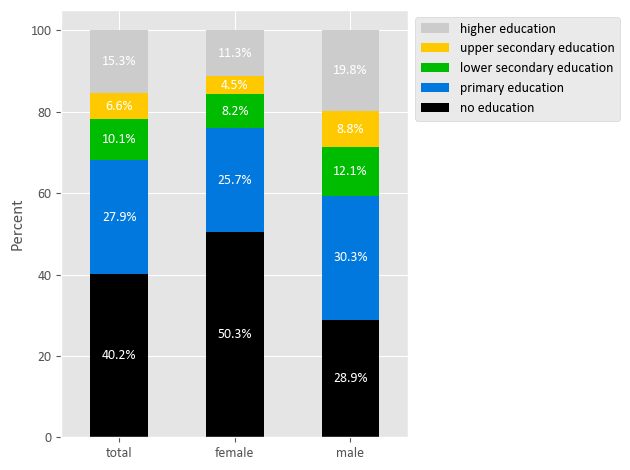

In [26]:
fig = pct_edu.plot.bar(stacked=True, colormap='nipy_spectral')

for bar in fig.containers:
    fig.bar_label(bar, label_type='center', color='white', fmt='%.1f%%')
    
fig.legend(bbox_to_anchor=(1, 1), loc=2, reverse=True)
fig.set_ylabel('Percent')
#fig.set_title('Educational attainment')

plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('fig10_educational_attainment.png')

#### Educational attainment by birthyear

In [27]:
# relative frequencies by birth year

pct_edu_byear = pd.crosstab(index=ihses['byear'], columns=ihses['edulevel'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_edu_byear = pct_edu_byear.reindex(['no education','primary education','lower secondary education',
                                       'upper secondary education','higher education'], 
     axis='columns')

pct_edu_byear

edulevel,no education,primary education,lower secondary education,upper secondary education,higher education
byear,,,,,
1947,63.571608,16.564862,3.621368,5.248494,10.993669
1948,56.949006,15.955393,6.788201,5.644863,14.662536
1949,65.432899,14.047310,5.874386,5.410031,9.235374
1950,68.816109,13.282907,7.449868,3.277944,7.173172
1951,56.933545,21.284130,8.100267,2.210476,11.471581
1952,58.679021,16.463144,6.858765,3.375081,14.623989
1953,62.428149,16.366663,6.366598,1.980858,12.857733
1954,61.238016,17.141279,6.569283,3.447352,11.604070
1955,57.306377,19.318719,7.518360,4.416744,11.439800


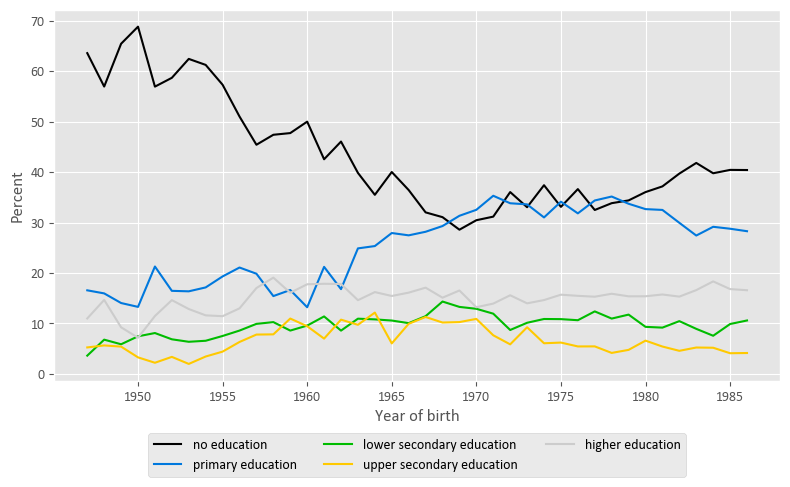

In [28]:
fig = pct_edu_byear.plot(colormap='nipy_spectral', figsize=(8,5))
fig.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=3)
fig.set_ylabel('Percent')
fig.set_xlabel('Year of birth')
#fig.set_title('Educational attainment by year of birth')

plt.tight_layout()
plt.savefig('fig11_educational_attainment_byear.png')

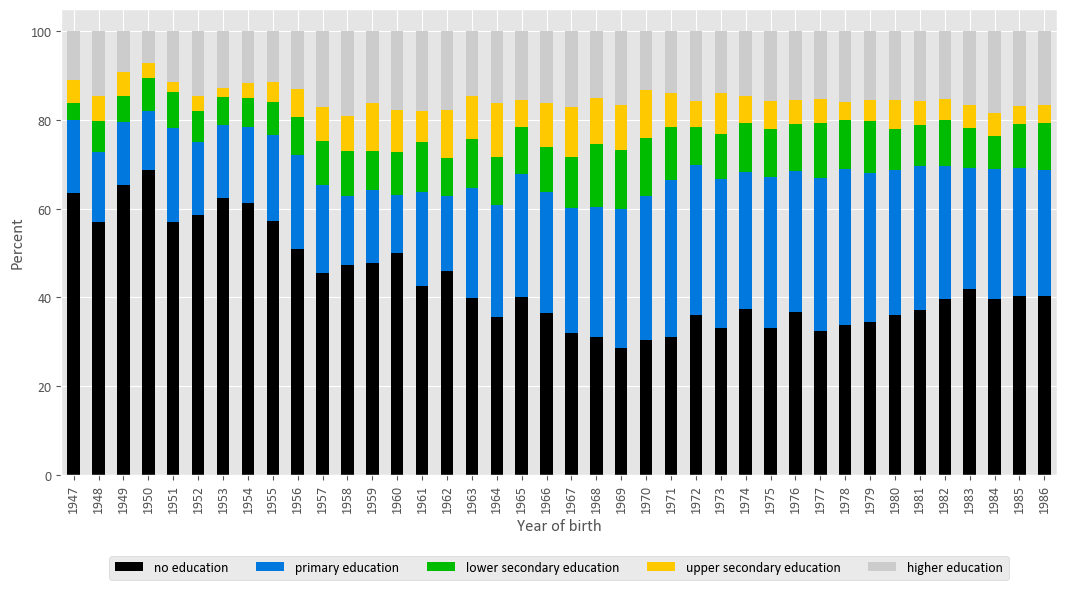

In [29]:
# alternative figure by birthyear

pct_edu_byear.plot(kind='bar', stacked=True, colormap='nipy_spectral', figsize=(11, 6))

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=5)
plt.xlabel('Year of birth')
plt.ylabel('Percent')
#plt.title('Educational attainment by year of birth')

plt.tight_layout()
#plt.savefig('fig11_educational_attainment_byear_v2.png')

#### Educational attainment by region

In [30]:
# relative frequencies by region
pct_edu_region = pd.crosstab(index=ihses['region'], columns=ihses['edulevel'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_edu_region.reset_index(inplace=True)

In [31]:
#Höchstlevels Bildung
pct_edu_region['at most primary'] = pct_edu_region['no education'] + pct_edu_region['primary education']
pct_edu_region['at most lower secondary'] = pct_edu_region['no education'] + pct_edu_region['primary education'] + pct_edu_region['lower secondary education']
pct_edu_region['at most upper secondary'] = pct_edu_region['no education'] + pct_edu_region['primary education'] + pct_edu_region['lower secondary education'] + pct_edu_region['upper secondary education']
pct_edu_region

edulevel,region,higher education,lower secondary education,no education,primary education,upper secondary education,at most primary,at most lower secondary,at most upper secondary
0,Anbar,14.557778,10.305472,36.813817,31.209399,7.113535,68.023215,78.328687,85.442222
1,Babil,15.015264,9.143834,32.329172,35.863221,7.648510,68.192392,77.336226,84.984736
2,Baghdad,19.946755,14.746121,27.641164,27.962806,9.703155,55.603970,70.350091,80.053245
3,Basrah,14.829813,10.898101,37.109183,31.607952,5.554951,68.717134,79.615235,85.170187
4,Diala,17.076598,10.800292,29.230876,35.889078,7.003157,65.119954,75.920245,82.923402
5,Duhok,11.123891,5.028297,62.954457,17.104014,3.789340,80.058471,85.086769,88.876109
6,Erbil,15.627952,7.587809,53.675739,17.791547,5.316953,71.467286,79.055095,84.372048
7,Karbala,16.609097,12.444607,35.903400,28.154570,6.888325,64.057971,76.502578,83.390903
8,Kirkuk,13.916013,6.455139,39.900277,34.271712,5.456859,74.171989,80.627128,86.083987
9,Misan,12.700559,8.216632,50.313514,24.563404,4.205891,74.876918,83.093550,87.299441


In [32]:
#Mindestlevels Bildung
pct_edu_region['at least primary'] = pct_edu_region['primary education'] + pct_edu_region['lower secondary education'] + pct_edu_region['upper secondary education'] + pct_edu_region['higher education']
pct_edu_region['at least lower secondary'] = pct_edu_region['lower secondary education'] + pct_edu_region['upper secondary education'] + pct_edu_region['higher education']
pct_edu_region['at least upper secondary'] = pct_edu_region['upper secondary education'] + pct_edu_region['higher education']
pct_edu_region

edulevel,region,higher education,lower secondary education,no education,primary education,upper secondary education,at most primary,at most lower secondary,at most upper secondary,at least primary,at least lower secondary,at least upper secondary
0,Anbar,14.557778,10.305472,36.813817,31.209399,7.113535,68.023215,78.328687,85.442222,63.186183,31.976785,21.671313
1,Babil,15.015264,9.143834,32.329172,35.863221,7.648510,68.192392,77.336226,84.984736,67.670828,31.807608,22.663774
2,Baghdad,19.946755,14.746121,27.641164,27.962806,9.703155,55.603970,70.350091,80.053245,72.358836,44.396030,29.649909
3,Basrah,14.829813,10.898101,37.109183,31.607952,5.554951,68.717134,79.615235,85.170187,62.890817,31.282866,20.384765
4,Diala,17.076598,10.800292,29.230876,35.889078,7.003157,65.119954,75.920245,82.923402,70.769124,34.880046,24.079755
5,Duhok,11.123891,5.028297,62.954457,17.104014,3.789340,80.058471,85.086769,88.876109,37.045543,19.941529,14.913231
6,Erbil,15.627952,7.587809,53.675739,17.791547,5.316953,71.467286,79.055095,84.372048,46.324261,28.532714,20.944905
7,Karbala,16.609097,12.444607,35.903400,28.154570,6.888325,64.057971,76.502578,83.390903,64.096600,35.942029,23.497422
8,Kirkuk,13.916013,6.455139,39.900277,34.271712,5.456859,74.171989,80.627128,86.083987,60.099723,25.828011,19.372872
9,Misan,12.700559,8.216632,50.313514,24.563404,4.205891,74.876918,83.093550,87.299441,49.686486,25.123082,16.906450


In [33]:
pcode = ['IQG01', 'IQG07', 'IQG08', 'IQG02', 'IQG10', 'IQG09', 'IQG11', 'IQG12', 'IQG13', 
                       'IQG14', 'IQG03', 'IQG15', 'IQG04', 'IQG05', 'IQG16', 'IQG06', 'IQG17', 'IQG18']

pct_edu_region['pcode'] = pcode

pct_edu_region

edulevel,region,higher education,lower secondary education,no education,primary education,upper secondary education,at most primary,at most lower secondary,at most upper secondary,at least primary,at least lower secondary,at least upper secondary,pcode
0,Anbar,14.557778,10.305472,36.813817,31.209399,7.113535,68.023215,78.328687,85.442222,63.186183,31.976785,21.671313,IQG01
1,Babil,15.015264,9.143834,32.329172,35.863221,7.648510,68.192392,77.336226,84.984736,67.670828,31.807608,22.663774,IQG07
2,Baghdad,19.946755,14.746121,27.641164,27.962806,9.703155,55.603970,70.350091,80.053245,72.358836,44.396030,29.649909,IQG08
3,Basrah,14.829813,10.898101,37.109183,31.607952,5.554951,68.717134,79.615235,85.170187,62.890817,31.282866,20.384765,IQG02
4,Diala,17.076598,10.800292,29.230876,35.889078,7.003157,65.119954,75.920245,82.923402,70.769124,34.880046,24.079755,IQG10
5,Duhok,11.123891,5.028297,62.954457,17.104014,3.789340,80.058471,85.086769,88.876109,37.045543,19.941529,14.913231,IQG09
6,Erbil,15.627952,7.587809,53.675739,17.791547,5.316953,71.467286,79.055095,84.372048,46.324261,28.532714,20.944905,IQG11
7,Karbala,16.609097,12.444607,35.903400,28.154570,6.888325,64.057971,76.502578,83.390903,64.096600,35.942029,23.497422,IQG12
8,Kirkuk,13.916013,6.455139,39.900277,34.271712,5.456859,74.171989,80.627128,86.083987,60.099723,25.828011,19.372872,IQG13
9,Misan,12.700559,8.216632,50.313514,24.563404,4.205891,74.876918,83.093550,87.299441,49.686486,25.123082,16.906450,IQG14


In [34]:
# shapefile
map_df = gpd.read_file('data/irq_admbnda_adm1_cso_20190603.shx')

In [35]:
#merge dataframes
df_merged = map_df.merge(pct_edu_region, left_on=['ADM1_PCODE'], right_on=['pcode'])

In [36]:
df_merged.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,...,no education,primary education,upper secondary education,at most primary,at most lower secondary,at most upper secondary,at least primary,at least lower secondary,at least upper secondary,pcode
0,17.090203,11.953673,Al-Anbar,الانبار,IQG01,None,None,None,None,None,...,36.813817,31.209399,7.113535,68.023215,78.328687,85.442222,63.186183,31.976785,21.671313,IQG01
1,8.057029,1.774143,Al-Basrah,البصرة,IQG02,None,None,None,None,None,...,37.109183,31.607952,5.554951,68.717134,79.615235,85.170187,62.890817,31.282866,20.384765,IQG02
2,10.084730,4.838574,Al-Muthanna,المثنى,IQG03,None,None,None,None,None,...,57.435981,21.675535,4.569730,79.111517,85.538423,90.108153,42.564019,20.888483,14.461577,IQG03
3,8.959419,3.797184,Al-Najaf,النجف,IQG04,None,None,None,None,None,...,40.996683,29.466436,7.143822,70.463119,79.287111,86.430933,59.003317,29.536881,20.712889,IQG04
4,4.772678,0.808105,Al-Qadissiya,القادسية,IQG05,None,None,None,None,None,...,44.190014,26.955556,5.174914,71.145570,80.926808,86.101722,55.809986,28.854430,19.073192,IQG05


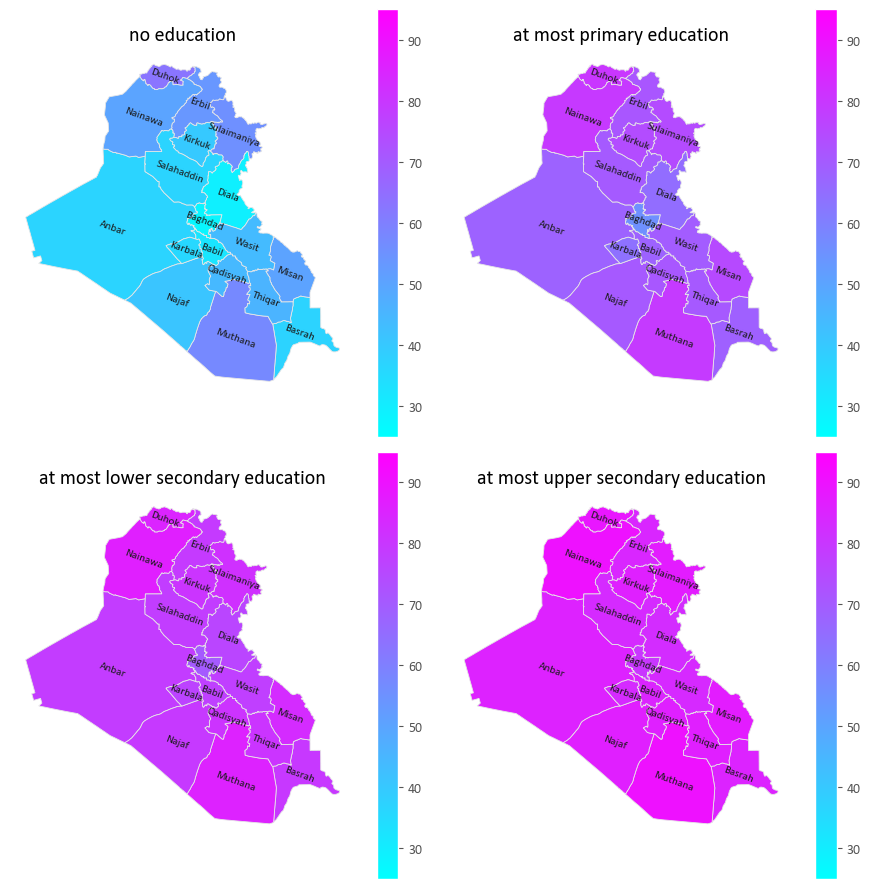

In [37]:
#Höchstlevels Bildung

fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(2, 2, 1)
df_merged.plot(column='no education', cmap='cool', linewidth=.6, ax=ax1, edgecolor='0.9', legend=True, vmin=25, vmax=95)
df_merged.apply(lambda x: ax1.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax1.set_title('no education')
ax1.axis('off')

ax2 = fig.add_subplot(2, 2, 2)
df_merged.plot(column='at most primary', cmap='cool', linewidth=.6, ax=ax2, edgecolor='0.9', legend=True, vmin=25, vmax=95)
df_merged.apply(lambda x: ax2.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax2.set_title('at most primary education')
ax2.axis('off')

ax3 = fig.add_subplot(2, 2, 3)
df_merged.plot(column='at most lower secondary', cmap='cool', linewidth=.6, ax=ax3, edgecolor='0.9', legend=True, vmin=25, vmax=95)
df_merged.apply(lambda x: ax3.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax3.set_title('at most lower secondary education')
ax3.axis('off')

ax4 = fig.add_subplot(2, 2, 4)
df_merged.plot(column='at most upper secondary', cmap='cool', linewidth=.6, ax=ax4, edgecolor='0.9', legend=True, vmin=25, vmax=95)
df_merged.apply(lambda x: ax4.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax4.set_title('at most upper secondary education')
ax4.axis('off')

plt.tight_layout()
#plt.savefig('fig12_educational_attainment_max_regional_v1.png')

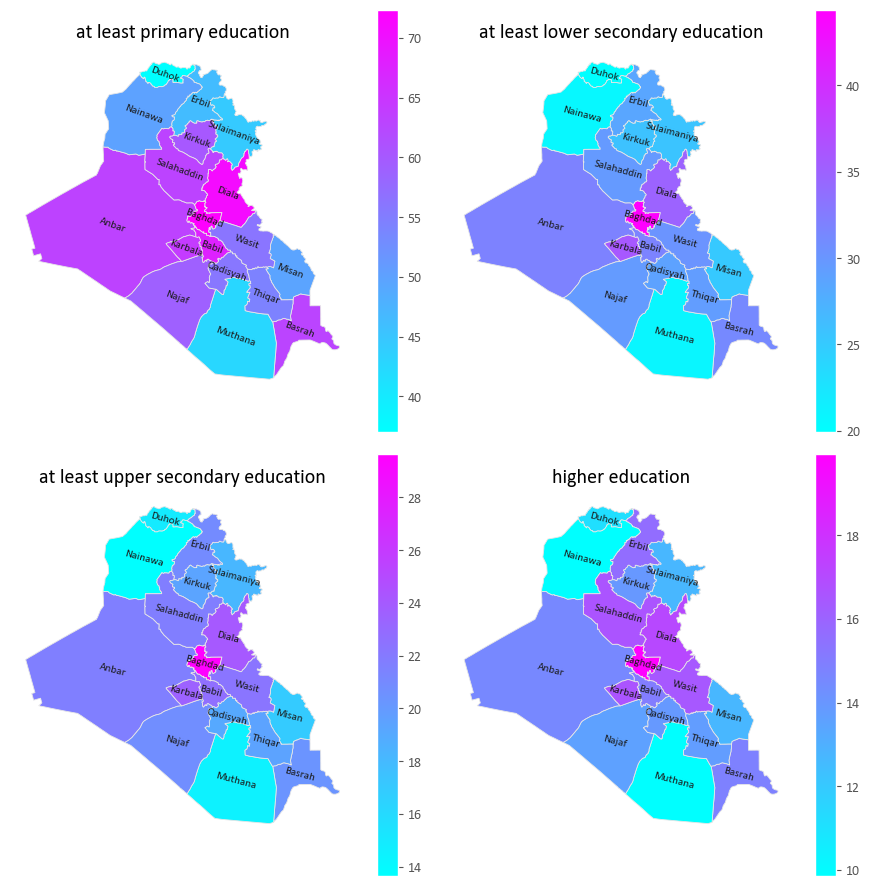

In [38]:
#Mindestlevels Bildung

fig = plt.figure(figsize=(9,9))

ax1 = fig.add_subplot(2, 2, 1)
df_merged.plot(column='at least primary', cmap='cool', linewidth=.6, ax=ax1, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax1.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax1.set_title('at least primary education')
ax1.axis('off')

ax2 = fig.add_subplot(2, 2, 2)
df_merged.plot(column='at least lower secondary', cmap='cool', linewidth=.6, ax=ax2, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax2.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-15, color='0.1', size=8), axis=1)
ax2.set_title('at least lower secondary education')
ax2.axis('off')

ax3 = fig.add_subplot(2, 2, 3)
df_merged.plot(column='at least upper secondary', cmap='cool', linewidth=.6, ax=ax3, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax3.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-15, color='0.1', size=8), axis=1)
ax3.set_title('at least upper secondary education')
ax3.axis('off')

ax4 = fig.add_subplot(2, 2, 4)
df_merged.plot(column='higher education', cmap='cool', linewidth=.6, ax=ax4, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax4.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-15, color='0.1', size=8), axis=1)
ax4.set_title('higher education')
ax4.axis('off')

plt.tight_layout()
#plt.savefig('fig12_educational_attainment_min_regional.png')

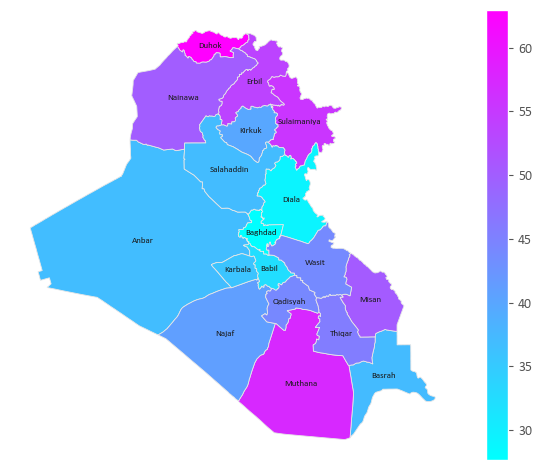

In [39]:
#Einzelgraphik

fig = df_merged.plot(column='no education', cmap='cool', linewidth=.6, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: fig.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], ha='center', va='center', color='0.1', size=6.5), axis=1)

#fig.set_title('Share of population with no formal education')

fig.axis('off')

plt.tight_layout()
#plt.savefig('fig12_educational_attainment_0_regional.png')

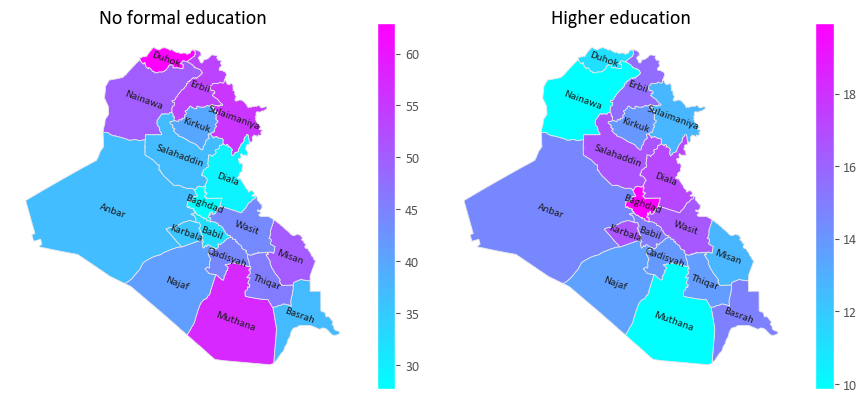

In [49]:
#Graphik: No education, higher education

fig = plt.figure(figsize=(9,4))

ax1 = fig.add_subplot(1, 2, 1)
df_merged.plot(column='no education', cmap='cool', linewidth=.6, ax=ax1, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax1.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax1.set_title('No formal education')
ax1.axis('off')

ax5 = fig.add_subplot(1, 2, 2)
df_merged.plot(column='higher education', cmap='cool', linewidth=.6, ax=ax5, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax5.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax5.set_title('Higher education')
ax5.axis('off')

plt.tight_layout()
plt.savefig('fig12_educational_attainment_regional.png')

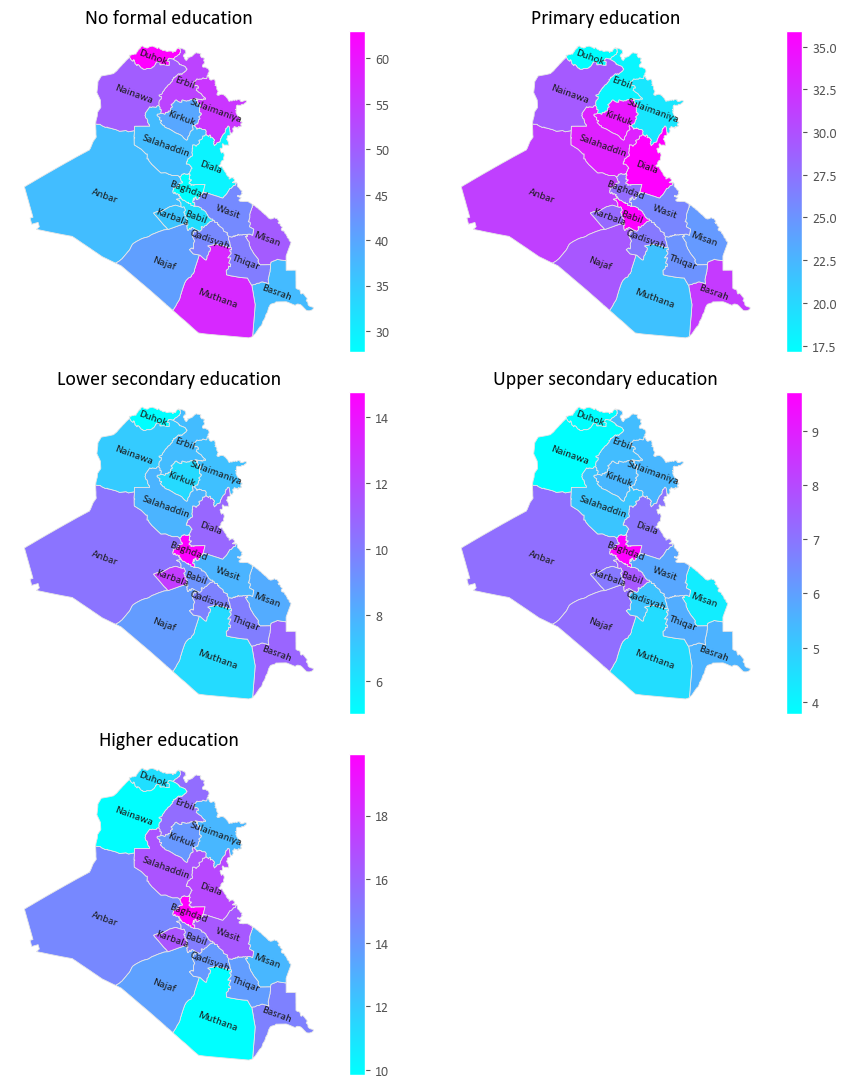

In [52]:
#Gesamtgraphik

fig = plt.figure(figsize=(9,11))

ax1 = fig.add_subplot(3, 2, 1)
df_merged.plot(column='no education', cmap='cool', linewidth=.6, ax=ax1, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax1.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax1.set_title('No formal education')
ax1.axis('off')

ax2 = fig.add_subplot(3, 2, 2)
df_merged.plot(column='primary education', cmap='cool', linewidth=.6, ax=ax2, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax2.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax2.set_title('Primary education')
ax2.axis('off')

ax3 = fig.add_subplot(3, 2, 3)
df_merged.plot(column='lower secondary education', cmap='cool', linewidth=.6, ax=ax3, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax3.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax3.set_title('Lower secondary education')
ax3.axis('off')

ax4 = fig.add_subplot(3, 2, 4)
df_merged.plot(column='upper secondary education', cmap='cool', linewidth=.6, ax=ax4, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax4.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax4.set_title('Upper secondary education')
ax4.axis('off')

ax5 = fig.add_subplot(3, 2, 5)
df_merged.plot(column='higher education', cmap='cool', linewidth=.6, ax=ax5, edgecolor='0.9', legend=True)
df_merged.apply(lambda x: ax5.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax5.set_title('Higher education')
ax5.axis('off')

plt.tight_layout()
plt.savefig('x_educational_attainment_regional.png')

### 2. Reasons for no/low education

#### Reasons: total and by gender

In [41]:
# relative frequencies: total

ihses['total'] = 'total'

pct_reason_total = pd.crosstab(index=ihses['total'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_total

reason,Could not afford school,Early marriage,Have to work,Household chores,No school in neighbourhood,Not interested,Other reasons,Social reasons
total,,,,,,,,
total,6.564157,4.499501,24.004133,4.137047,9.720689,16.002785,8.559724,26.511964


In [42]:
# relative frequencies: by gender

pct_reason_gender = pd.crosstab(index=ihses['gender'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_gender

reason,Could not afford school,Early marriage,Have to work,Household chores,No school in neighbourhood,Not interested,Other reasons,Social reasons
gender,,,,,,,,
female,5.146485,8.062665,1.060973,7.086830,11.569260,12.625837,6.369449,48.078501
male,8.302000,0.131623,52.128836,0.521078,7.454633,20.142391,11.244656,0.074784


In [43]:
# concatenate aggregate tables

pct_reason = pd.concat([pct_reason_total, pct_reason_gender])

pct_reason = pct_reason.sort_values('total', axis=1, ascending=False)

pct_reason = pct_reason.reindex(['Social reasons', 'Have to work', 'Not interested', 
                               'No school in neighbourhood', 'Could not afford school', 'Early marriage',
                               'Household chores', 'Other reasons'], axis=1)

pct_reason

reason,Social reasons,Have to work,Not interested,No school in neighbourhood,Could not afford school,Early marriage,Household chores,Other reasons
total,26.511964,24.004133,16.002785,9.720689,6.564157,4.499501,4.137047,8.559724
female,48.078501,1.060973,12.625837,11.569260,5.146485,8.062665,7.086830,6.369449
male,0.074784,52.128836,20.142391,7.454633,8.302000,0.131623,0.521078,11.244656


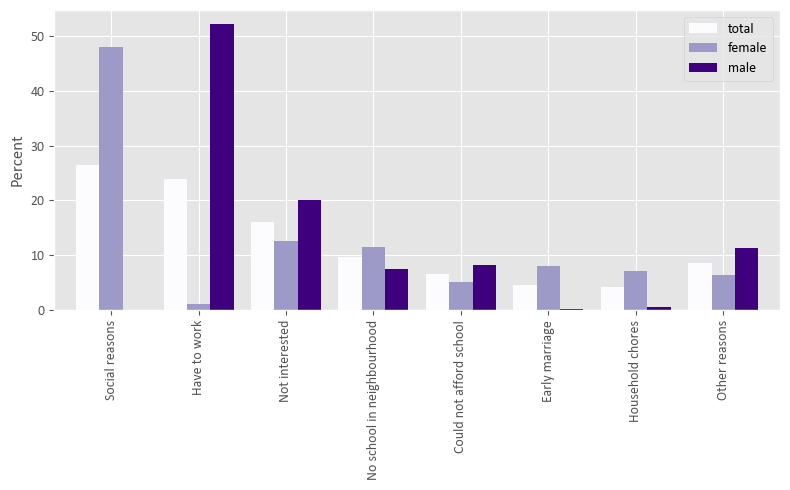

In [44]:
# figure: total and by gender
pct_reason_t = pct_reason.transpose()

fig = pct_reason_t.plot(kind='bar', colormap='Purples', figsize=(8,5), width=.8)
fig.legend(bbox_to_anchor=(1, 1), loc=1)
fig.set_xlabel('')
fig.set_ylabel('Percent')
#fig.set_title('Reasons for no/low education')

plt.tight_layout()
plt.savefig('fig15_reasons_v1.png')

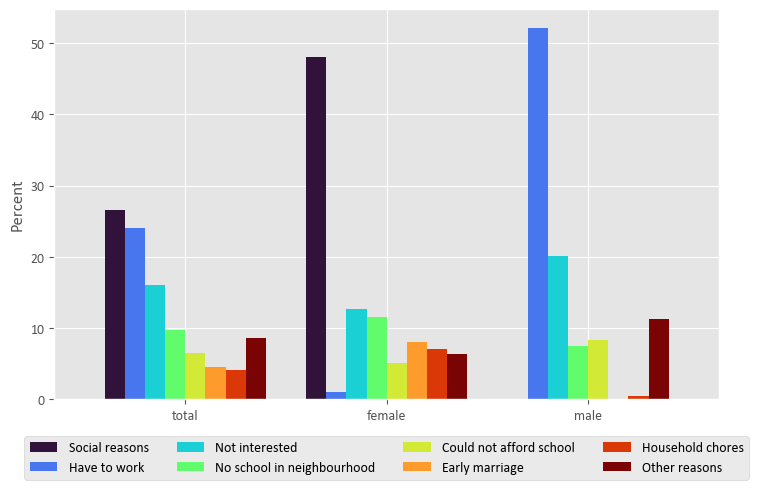

In [50]:
# figure: total and by gender (V2)
fig = pct_reason.plot(kind='bar', colormap='turbo', figsize=(8,5), width=.8)
fig.legend(bbox_to_anchor=(0.5, -0.15), loc='center', ncol=4)

fig.set_xlabel('')
fig.set_ylabel('Percent')
#fig.set_title('Reasons for no/low education')

plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('fig15_reasons_v2.png')

#### Reasons by birthyear (three-year rolling average)

In [46]:
pct_reason_age = pd.crosstab(index=ihses['byear'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_age_roll = pct_reason_age.rolling(window = 3, min_periods=1).mean()

pct_reason_age_roll = pct_reason_age_roll.reindex(['Social reasons', 'Have to work', 'Not interested', 
                               'No school in neighbourhood', 'Could not afford school', 'Early marriage',
                               'Household chores', 'Other reasons'], axis=1)

pct_reason_age_roll

reason,Social reasons,Have to work,Not interested,No school in neighbourhood,Could not afford school,Early marriage,Household chores,Other reasons
byear,,,,,,,,
1947,25.416926,21.015329,8.413346,29.280809,2.529943,6.926461,1.127686,5.289500
1948,27.711156,22.493323,7.978934,24.060259,2.056457,6.370366,2.518674,6.810831
1949,27.792402,22.758351,7.468103,24.106794,2.466385,5.545366,2.810817,7.051783
1950,28.360276,22.368589,7.588888,22.301586,2.637577,5.188678,3.516986,8.037420
1951,25.571532,23.965031,9.274173,21.685496,3.655557,4.151888,3.493765,8.202558
1952,25.761515,22.966747,10.867480,20.899744,4.014960,4.201214,3.300247,7.988094
1953,25.766452,23.565801,10.860606,19.167305,5.703102,3.519143,3.426013,7.991579
1954,27.447411,21.842346,9.979316,20.006859,5.894244,4.111145,3.506602,7.212077
1955,27.619108,23.586472,9.714815,18.393821,5.499189,4.798750,3.434739,6.953107


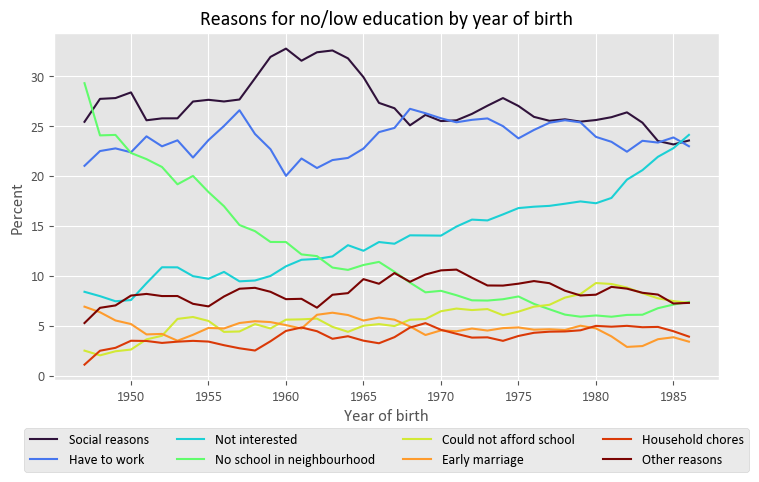

In [47]:
# figure by birthyear
fig = pct_reason_age_roll.plot(colormap='turbo', figsize=(8,5))
fig.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=4)
fig.set_ylabel('Percent')
fig.set_xlabel('Year of birth')
fig.set_title('Reasons for no/low education by year of birth')

plt.tight_layout()
#plt.savefig('fig16_reasons_birthyear.png')

#### Reasons by birthyear and gender

In [48]:
pct_reason_age_m = pd.crosstab(index=ihses['byear'][ihses['gender']=="male"], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_age_m = pct_reason_age_m.rolling(window = 3, min_periods=1).mean()

pct_reason_age_m = pct_reason_age_m.reindex(['Social reasons', 'Have to work', 'Not interested', 
                               'No school in neighbourhood', 'Could not afford school', 'Early marriage',
                               'Household chores', 'Other reasons'], axis=1)

pct_reason_age_m

reason,Social reasons,Have to work,Not interested,No school in neighbourhood,Could not afford school,Early marriage,Household chores,Other reasons
byear,,,,,,,,
1947,0.343737,46.726352,10.401926,27.911448,4.937997,0.328788,0.000000,9.349751
1948,0.171869,50.631117,11.712545,21.729756,3.906466,0.164394,0.000000,11.683854
1949,0.162823,52.019165,9.879440,20.784812,4.546395,0.157840,0.232827,12.216699
1950,0.129437,51.535477,9.760094,19.445887,4.188354,0.156411,0.268553,14.515786
1951,0.129437,51.246886,10.553205,18.691738,5.263943,0.156411,0.485514,13.472866
1952,0.234560,48.583455,14.086344,18.261488,5.778698,0.177983,0.454533,12.422939
1953,0.153368,49.107016,13.548287,15.986248,9.614419,0.069816,0.476131,11.044715
1954,0.229555,50.487623,11.825201,16.659216,10.000361,0.089160,0.276581,10.432304
1955,0.135665,54.750912,10.875594,15.129633,8.863260,0.019344,0.176415,10.049178


In [49]:
pct_reason_age_f = pd.crosstab(index=ihses['byear'][ihses['gender']=="female"], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_age_f = pct_reason_age_f.rolling(window = 3, min_periods=1).mean()

pct_reason_age_f = pct_reason_age_f.reindex(['Social reasons', 'Have to work', 'Not interested', 
                               'No school in neighbourhood', 'Could not afford school', 'Early marriage',
                               'Household chores', 'Other reasons'], axis=1)

pct_reason_age_f

reason,Social reasons,Have to work,Not interested,No school in neighbourhood,Could not afford school,Early marriage,Household chores,Other reasons
byear,,,,,,,,
1947,44.945397,0.990075,6.864523,30.347348,0.654410,12.065116,2.005994,2.127138
1948,49.241773,0.495038,5.056115,25.884322,0.612055,11.219714,4.490972,3.000010
1949,48.662210,0.710610,5.574200,26.565810,0.908313,9.657057,4.757516,3.164284
1950,49.615520,0.472400,5.885923,24.397525,1.494232,9.006619,5.976186,3.151595
1951,46.782654,1.080319,7.993417,24.256721,2.321964,7.424472,6.080431,4.060021
1952,47.369098,0.934323,8.156143,23.271947,2.536090,7.539320,5.799174,4.393906
1953,48.025420,1.048049,8.565087,21.991730,2.414826,6.497723,6.079530,5.377635
1954,47.846059,0.619491,8.631724,22.439783,2.673852,7.107945,5.915343,4.765804
1955,47.991255,0.765098,8.900712,20.734299,2.833127,8.308096,5.846688,4.620724


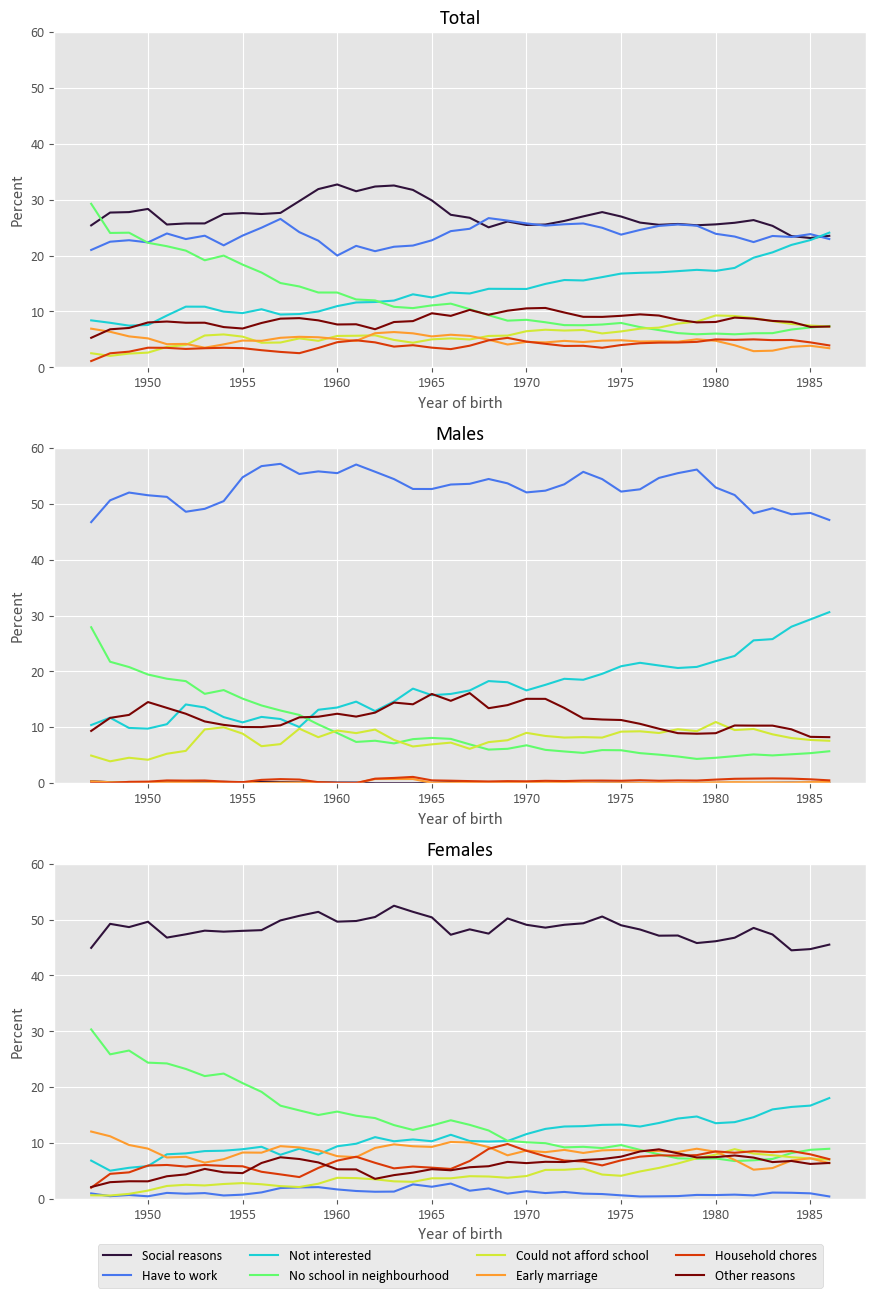

In [55]:
#figure by birthyear and gender
fig = plt.figure(figsize=(9,13))
#fig.suptitle('Reasons for no/low education by year of birth and gender', fontsize=16)

ax1 = fig.add_subplot(3, 1, 1)
pct_reason_age_roll.plot(ax=ax1, colormap='turbo', legend=False)
ax1.set_ylabel('Percent')
ax1.set_xlabel('Year of birth')
ax1.set_ylim([0, 60])
ax1.set_title('Total')

ax2 = fig.add_subplot(3, 1, 2)
pct_reason_age_m.plot(ax=ax2, colormap='turbo', legend=False)
ax2.set_ylabel('Percent')
ax2.set_xlabel('Year of birth')
ax2.set_ylim([0, 60])
ax2.set_title('Males')

ax3 = fig.add_subplot(3, 1, 3)
pct_reason_age_f.plot(ax=ax3, colormap='turbo')
ax3.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=4)
ax3.set_ylabel('Percent')
ax3.set_xlabel('Year of birth')
ax3.set_ylim([0, 60])
ax3.set_title('Females')

plt.tight_layout()
plt.savefig('fig16_reasons_birthyear_gender.png')

#### Reasons by educational level

In [52]:
# relative frequencies by educational level

pct_reason_edu = pd.crosstab(index=ihses['edulevel'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_edu = pct_reason_edu.reindex(['Social reasons', 'Have to work', 'Not interested', 
                               'No school in neighbourhood', 'Could not afford school', 'Early marriage',
                               'Household chores', 'Other reasons'], axis=1).reindex(['no education', 'primary education',
                                                                              'lower secondary education', 'upper secondary education'], axis=0)

pct_reason_edu

reason,Social reasons,Have to work,Not interested,No school in neighbourhood,Could not afford school,Early marriage,Household chores,Other reasons
edulevel,,,,,,,,
no education,32.718782,15.623380,14.401181,16.113723,6.357879,2.229086,4.534411,8.021559
primary education,24.144037,28.150612,18.763426,5.233571,7.583566,4.713827,4.166463,7.244497
lower secondary education,17.208655,34.679282,16.303977,2.136934,5.588223,9.519793,4.052716,10.510420
upper secondary education,12.823770,41.340570,13.607540,1.271905,4.986881,9.800569,1.706706,14.462059


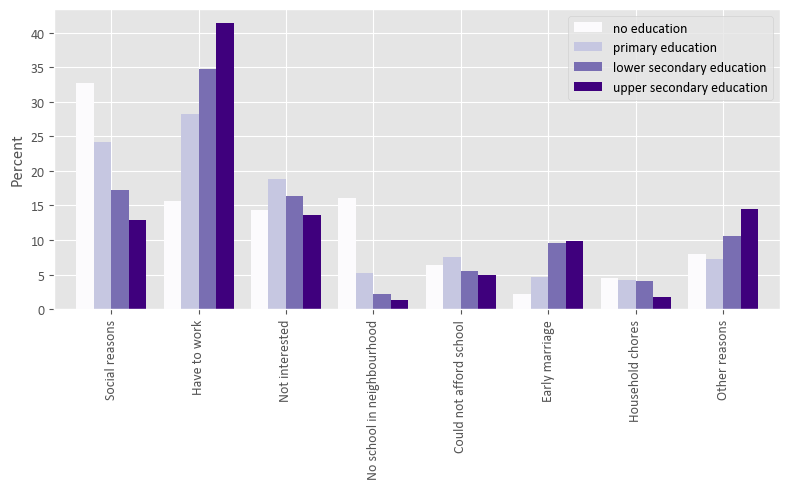

In [53]:
# figure: reasons by educational level
pct_reason_edu_t = pct_reason_edu.transpose()

fig = pct_reason_edu_t.plot(kind='bar', colormap='Purples', figsize=(8,5), width=.8)
fig.legend(bbox_to_anchor=(1, 1), loc=1)
fig.set_xlabel('')
fig.set_ylabel('Percent')
#fig.set_title('Reasons for no/low education by educational attainment')

plt.tight_layout()
plt.savefig('fig17_reasons_edulevel_v1.png')

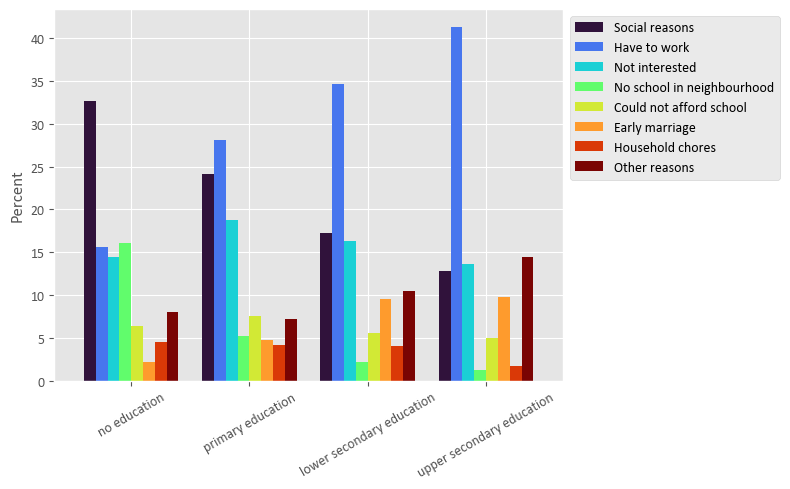

In [55]:
# figure: reasons by educational level (V2)
fig = pct_reason_edu.plot(kind='bar', colormap='turbo', figsize=(8,5), width=.8)
#fig.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=4)
fig.legend(bbox_to_anchor=(1, 1), loc=2)

fig.set_xlabel('')
fig.set_ylabel('Percent')
#fig.set_title('Reasons for no/low education by educational attainment')

plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig('fig17_reasons_edulevel_v2.png')

#### Reasons by region

In [114]:
# relative frequencies by region
pct_reason_region = pd.crosstab(index=ihses['region'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_region.reset_index(inplace=True)

In [115]:
pct_reason_region['pcode'] = pcode

pct_reason_region

reason,region,Could not afford school,Early marriage,Have to work,Household chores,No school in neighbourhood,Not interested,Other reasons,Social reasons,pcode
0,Anbar,2.301795,2.481289,27.091532,0.750086,15.792427,12.788335,3.847465,34.947071,IQG01
1,Babil,4.709616,5.558026,27.227558,0.817768,9.788014,11.468924,8.012881,32.417214,IQG07
2,Baghdad,4.386844,7.175041,29.144400,4.547390,3.501791,14.958283,7.717709,28.568542,IQG08
3,Basrah,17.917300,5.199456,12.676337,3.396117,5.846947,24.086725,7.476744,23.400374,IQG02
4,Diala,7.260233,6.623146,30.468402,5.774056,7.390289,20.763054,8.306608,13.414212,IQG10
5,Duhok,5.760861,2.279556,11.569398,8.227761,21.001690,20.620053,17.690384,12.850298,IQG09
6,Erbil,5.327255,1.985443,20.850309,4.957629,11.060266,18.661972,16.391906,20.765221,IQG11
7,Karbala,10.762970,4.389825,22.747879,5.179280,9.219109,9.850167,7.624796,30.225975,IQG12
8,Kirkuk,4.226678,2.541376,26.298995,1.803839,2.859867,19.379124,6.850642,36.039479,IQG13
9,Misan,6.007799,3.902402,30.685283,7.444807,9.243603,10.447248,5.233838,27.035021,IQG14


In [116]:
#merge dataframes
df_merged_region = map_df.merge(pct_reason_region, left_on=['ADM1_PCODE'], right_on=['pcode'])

In [117]:
df_merged_region.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,...,region,Could not afford school,Early marriage,Have to work,Household chores,No school in neighbourhood,Not interested,Other reasons,Social reasons,pcode
0,17.090203,11.953673,Al-Anbar,الانبار,IQG01,None,None,None,None,None,...,Anbar,2.301795,2.481289,27.091532,0.750086,15.792427,12.788335,3.847465,34.947071,IQG01
1,8.057029,1.774143,Al-Basrah,البصرة,IQG02,None,None,None,None,None,...,Basrah,17.917300,5.199456,12.676337,3.396117,5.846947,24.086725,7.476744,23.400374,IQG02
2,10.084730,4.838574,Al-Muthanna,المثنى,IQG03,None,None,None,None,None,...,Muthana,8.063105,2.125621,24.499635,1.127362,13.796464,7.559869,4.903332,37.924613,IQG03
3,8.959419,3.797184,Al-Najaf,النجف,IQG04,None,None,None,None,None,...,Najaf,8.359016,5.882357,22.066379,2.634323,10.302584,17.509492,9.667706,23.578143,IQG04
4,4.772678,0.808105,Al-Qadissiya,القادسية,IQG05,None,None,None,None,None,...,Qadisyah,12.797765,2.924109,20.243244,2.473519,16.896382,13.393661,6.582812,24.688508,IQG05


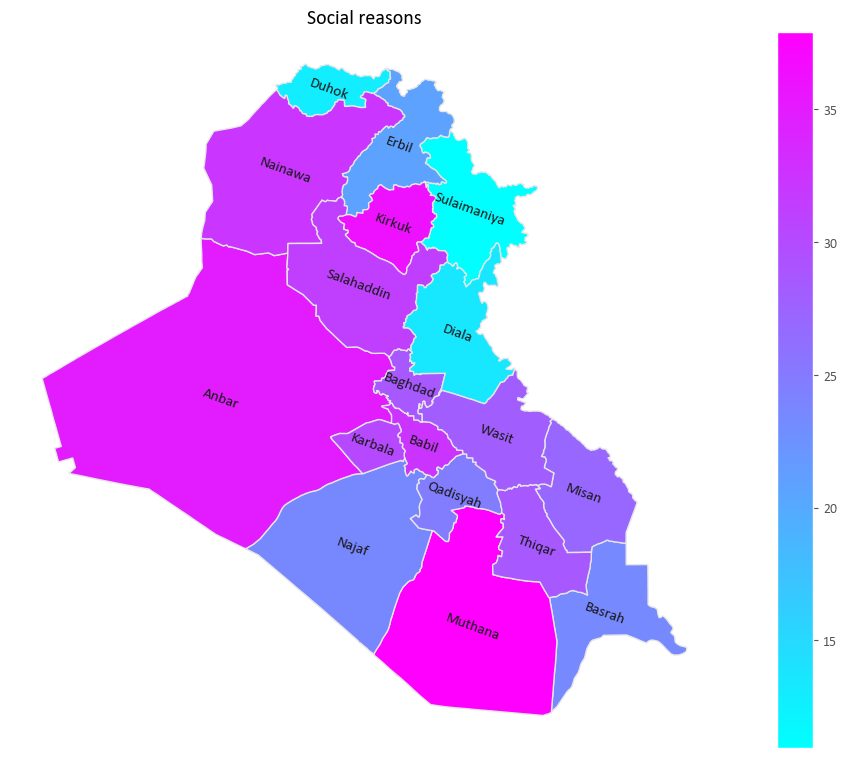

In [122]:
#Einzelgraphik Social Reasons

fig = plt.figure(figsize=(12,15))
            
ax1 = fig.add_subplot(2, 1, 1)
df_merged_region.plot(column='Social reasons', cmap='cool', linewidth=.6, ax=ax1, edgecolor='0.9', legend=True)
df_merged_region.apply(lambda x: ax1.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=10), axis=1)
ax1.set_title('Social reasons')
ax1.axis('off')

#ax2 = fig.add_subplot(2, 1, 2)
#df_merged_region.plot(column='Have to work', cmap='viridis', linewidth=.6, ax=ax2, edgecolor='0.9', legend=True)
#df_merged_region.apply(lambda x: ax2.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
#                                       ha='center', va='center', rotation=-20, color='0.1', size=10), axis=1)#ax2.set_title('Have to work')
#ax2.axis('off')

plt.tight_layout()
#plt.savefig('x_reasons_regional_einzel.png')

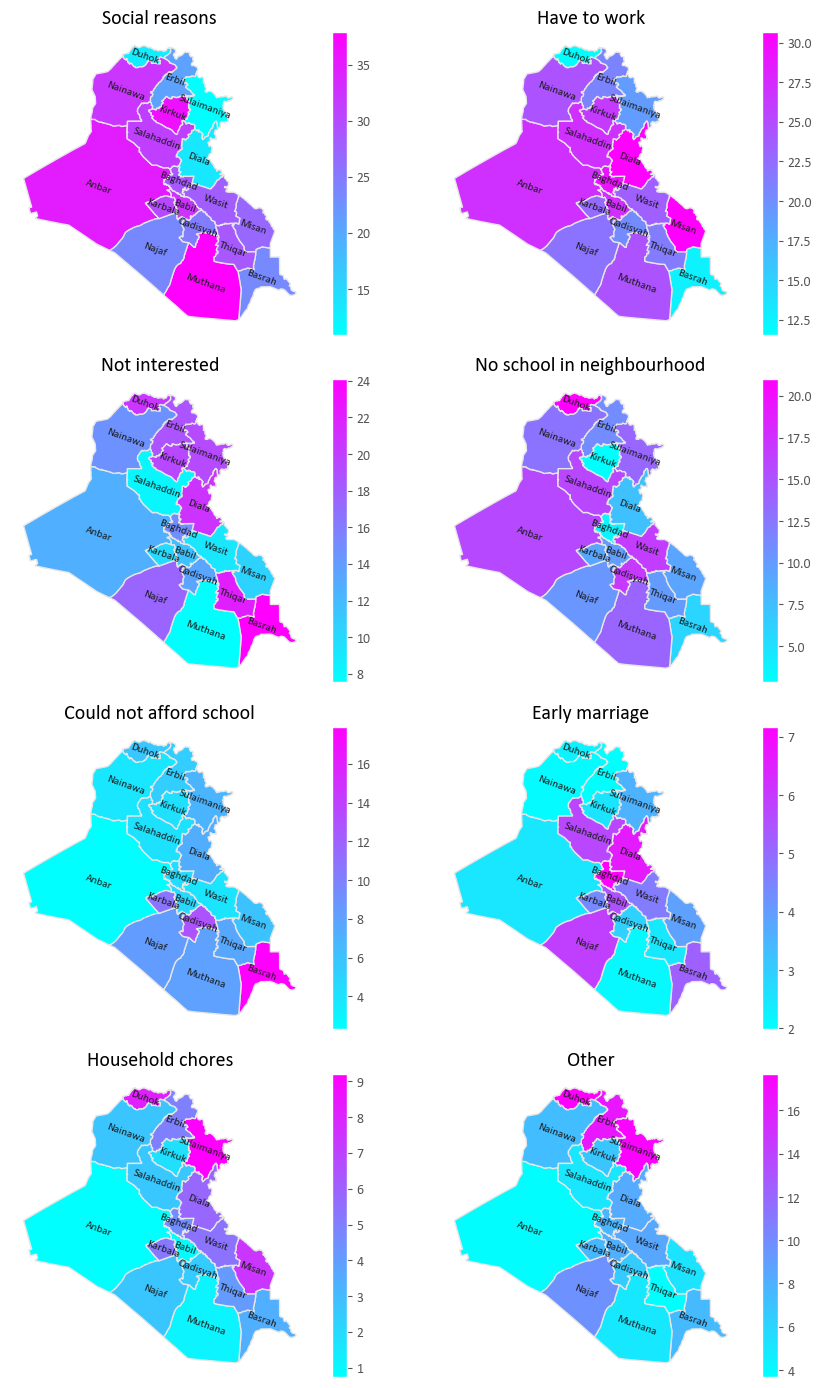

In [127]:
#Gesamtgraphik

fig = plt.figure(figsize=(9,14))

#fig.suptitle('Reasons for no/low education by region', fontsize=18)
            
ax1 = fig.add_subplot(4, 2, 1)
df_merged_region.plot(column='Social reasons', cmap='cool', linewidth=.6, ax=ax1, edgecolor='0.9', legend=True)
df_merged_region.apply(lambda x: ax1.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax1.set_title('Social reasons')
ax1.axis('off')

ax2 = fig.add_subplot(4, 2, 2)
df_merged_region.plot(column='Have to work', cmap='cool', linewidth=.6, ax=ax2, edgecolor='0.9', legend=True)
df_merged_region.apply(lambda x: ax2.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax2.set_title('Have to work')
ax2.axis('off')

ax3 = fig.add_subplot(4, 2, 3)
df_merged_region.plot(column='Not interested', cmap='cool', linewidth=.6, ax=ax3, edgecolor='0.9', legend=True)
df_merged_region.apply(lambda x: ax3.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax3.set_title('Not interested')
ax3.axis('off')

ax4 = fig.add_subplot(4, 2, 4)
df_merged_region.plot(column='No school in neighbourhood', cmap='cool', linewidth=.6, ax=ax4, edgecolor='0.9', legend=True)
df_merged_region.apply(lambda x: ax4.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax4.set_title('No school in neighbourhood')
ax4.axis('off')

ax5 = fig.add_subplot(4, 2, 5)
df_merged_region.plot(column='Could not afford school', cmap='cool', linewidth=.6, ax=ax5, edgecolor='0.9', legend=True)
df_merged_region.apply(lambda x: ax5.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax5.set_title('Could not afford school')
ax5.axis('off')

ax6 = fig.add_subplot(4, 2, 6)
df_merged_region.plot(column='Early marriage', cmap='cool', linewidth=.6, ax=ax6, edgecolor='0.9', legend=True)
df_merged_region.apply(lambda x: ax6.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax6.set_title('Early marriage')
ax6.axis('off')

ax7 = fig.add_subplot(4, 2, 7)
df_merged_region.plot(column='Household chores', cmap='cool', linewidth=.6, ax=ax7, edgecolor='0.9', legend=True)
df_merged_region.apply(lambda x: ax7.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax7.set_title('Household chores')
ax7.axis('off')

ax8 = fig.add_subplot(4, 2, 8)
df_merged_region.plot(column='Other reasons', cmap='cool', linewidth=.6, ax=ax8, edgecolor='0.9', legend=True)
df_merged_region.apply(lambda x: ax8.annotate(text=x['region'], xy=x.geometry.centroid.coords[0], 
                                       ha='center', va='center', rotation=-20, color='0.1', size=8), axis=1)
ax8.set_title('Other')
ax8.axis('off')

plt.tight_layout()
#plt.savefig('x_reasons_regional_gesamt.png')